Αϊβαλής Θεόδωρος 03117099

Σαλιαράκης Παύλος 03117135

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score, confusion_matrix
from sklearn.svm import SVC, LinearSVC
from sklearn.dummy import DummyClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
import matplotlib.pyplot as plt
from imblearn.pipeline import Pipeline
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler 
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn import neighbors
import seaborn as sns
import time
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import LabelEncoder, StandardScaler


df_data = pd.read_csv("/kaggle/input/csgo-round-winner-classification/csgo_round_snapshots.csv")
print(df_data.shape)
df_data.head()

(122410, 97)


,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner
0,175.00,0.0,0.0,de_dust2,False,500.0,500.0,0.0,0.0,4000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
1,156.03,0.0,0.0,de_dust2,False,500.0,500.0,400.0,300.0,600.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
2,96.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
3,76.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
4,174.97,1.0,0.0,de_dust2,False,500.0,500.0,192.0,0.0,18350.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT


Βλέπουμε ότι τα δεδομένα μας είναι 122410 και έχουν 97 χαρακτηριστικά με το κάθε ένα να έχει και το δικό της όνομα. Επίσης υπάρχουν επικεφαλίδες και αρίθμηση γραμμών για τα δεδομένα μας.

Παρατηρώντας τα δεδομένα μας δεν έχουμε απουσιάζουσες τιμές στα δεδομένα μας.

Το σύνολο δεδομένων αποτελείται από στιγμιότυπα από περίπου 700 demo από παιχνίδια υψηλού επιπέδου. Καταγράφεται ένα στιγμιότυπο γύρου κάθε 20 δευτερόλεπτα. Έχει υποστεί προεπεξεργασία για να βελτιωθεί η αναγνωσιμότητα και να διευκολυνθεί η επεξεργασία. Ο συνολικός αριθμός των στιγμιότυπων είναι 122411. Τα στιγμιότυπα είναι iid και θα πρέπει να αντιμετωπίζονται ως μεμονωμένα σημεία δεδομένων και όχι ως μέρος ενός αγώνα.

Σχετικά με τα χαρακτηριστικά αυτά αφορούν το εναπομείναν χρόνο, το score, το map, την υγεία,τα όπλα, τον εξοπλισμό, καθώς και τη τελευταία στήλη-χαρακτηριστικό που είναι ο round winner.

Η τελευταία αυτή στήλη περιέχει τις ετικέτες των κλάσεων.
Εδώ έχουμε 2 (binary) κλάσεις(T, CT). 

<AxesSubplot:xlabel='round_winner', ylabel='Count'>

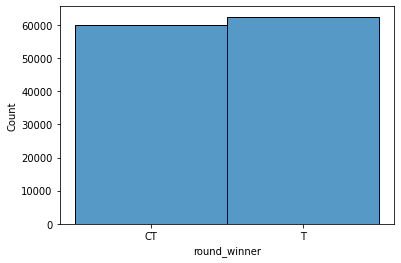

In [ ]:
sns.histplot(data = df_data, x = 'round_winner')

Παρατηρούμε ότι οι δύο κλάσεις είναι σχετικά ισοπληθείς. Αρα το dataset μας είναι ισορροπημενο (60%-40% σε binary datasets).

In [ ]:
encoder = LabelEncoder()
scaler = StandardScaler()

In [ ]:
for column in df_data.columns:
    if len(df_data[column].unique()) == 1:
        df_data = df_data.drop([column], axis = 1)
        
df_data['round_winner'] = df_data['round_winner'].replace({'T' : 0, 'CT' : 1})
df_data['bomb_planted'] = df_data['bomb_planted'].astype(np.int16)
y = df_data['round_winner']
df_data = df_data.drop('round_winner', axis = 1)
df_data['map'] = encoder.fit_transform(df_data['map'])

In [ ]:
print(y.shape)

(122410,)


In [ ]:
zeros_values = 0
ones_values = 0
missing_values = 0
for i in range (122410):
  if (y[i] == 0):
    zeros_values += 1
  elif (y[i] ==1):
    ones_values += 1
  else:
    missing_values += 1
    
print("Πλήθος δειγμάτων της κλασης 0:", zeros_values)
print("Πλήθος δειγμάτων της κλασης 1:", ones_values)
print("Πλήθος απουσιαζουσών τιμών:", missing_values)

print("Ποσοστό δειγμάτων της κλάσης 0(στα συνολικά δείγματα):", zeros_values/122410*100, "%")
print("Ποσοστό δειγμάτων της κλάσης 1(στα συνολικά δείγματα):", ones_values/122410*100, "%")

Πλήθος δειγμάτων της κλασης 0: 62406
Πλήθος δειγμάτων της κλασης 1: 60004
Πλήθος απουσιαζουσών τιμών: 0
Ποσοστό δειγμάτων της κλάσης 0(στα συνολικά δείγματα): 50.98112899272935 %
Ποσοστό δειγμάτων της κλάσης 1(στα συνολικά δείγματα): 49.01887100727065 %


Εδώ χωρίζουμε τα δεδομένα μας σε train και test.

In [ ]:
X = pd.DataFrame(scaler.fit_transform(df_data), columns = df_data.columns)
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle = True, train_size = 0.7)

Εδώ βλέπουμε πόσα είναι τα δεδομένα εκπάιδευσης και πόσα τα δεδομένα ελέγχου

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(85687, 90)
(85687,)
(36723, 90)
(36723,)


## ESTIMATORS

Η μέθοδος SVM είναι ευέλικτη μέθοδος εποπτευόμενης μηχανικής εκμάθησης που χρησιμοποιείται για ταξινόμηση, παλινδρόμηση και ανίχνευση ακραίων τιμών. Τα SVM είναι πολύ αποτελεσματικά σε χώρους υψηλών διαστάσεων. Είναι δημοφιλή και αποδοτικά στη μνήμη επειδή χρησιμοποιούν ένα υποσύνολο σημείων εκπαίδευσης στη συνάρτηση απόφασης.

Ο κύριος στόχος των SVM είναι να χωρίσουν τα σύνολα δεδομένων σε κλάσεις προκειμένου να βρεθεί ένα μέγιστο οριακό υπερεπίπεδο.

Εμείς εδώ θα χρησιμοποιήσουμε τον SVC estimator.

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.neural_network import MLPClassifier

In [ ]:
svc = SVC()
svc.fit(X_train,y_train)
pred_SVM = svc.predict(X_test)

Και παρακάτω βλέπουμετο score που πετυχαινεί ο παραπάνω ταξινομητής.

κάνουμε χρήση των μετρικών precision, recall και f1-score.

## Precision

Ακρίβεια -Precision- ($P$) είναι ο λόγος των true positives ($T_p$) ως προς τον αριθμό των true positives συν τον αριθμό των false positives ($F_p$).
$$P = \frac{T_p}{T_p+F_p}$$

## Recall

Ανάκληση -Recall- ($R$) είναι ο λόγος των true positives ($T_p$) ως προς τον αριθμό των true positives συν τον αριθμό των false negatives ($F_n$).
$$R = \frac{T_p}{T_p + F_n}$$

## f1-score

Xρησιμοποιούμε και το ($F_1$) score, το οποίο είναι ο αρμονικός μέσος της ακρίβειας και της ανάκλησης.
$$F1 = 2\frac{P \times R}{P+R}$$

In [ ]:
print(classification_report(y_test, pred_SVM))

              precision    recall  f1-score   support

           0       0.83      0.73      0.78     18768
           1       0.75      0.84      0.79     17955

    accuracy                           0.79     36723
   macro avg       0.79      0.79      0.79     36723
weighted avg       0.79      0.79      0.79     36723



Ιδανικά θέλουμε και υψηλή ακρίβεια και υψηλή ανάκληση, ωστόσο μεταξύ της ακρίβειας και της ανάκλησης υπάρχει γενικά trade-off.
Γενικά, κατεβάζοντας το κατώφλι της απόφασης του ταξινομητή, αυξάνουμε την ανάκληση και μειώνουμε την ακρίβεια και αντιστρόφως.

## Multi Layer Perceptron (MLP)
Ο MLPClassifier είναι ένας ταξινομητής Perceptron πολλαπλών επιπέδων. Σε αντίθεση με άλλους αλγόριθμους ταξινόμησης, όπως το Support Vectors ή ο Naive Bayes Classifier, ο MLPClassifier βασίζεται σε ένα υποκείμενο νευρωνικό δίκτυο για να εκτελέσει την ταξινόμηση.

Ωστόσο, μια ομοιότητα με τους άλλους αλγόριθμους ταξινόμησης του Scikit-Learn είναι ότι η υλοποίηση του MLPClassifier δεν απαιτεί περισσότερη προσπάθεια από τις άλλες μεθόδους.

In [ ]:
mlp = MLPClassifier()
mlp.fit(X_train, y_train)
prediction_MLP = mlp.predict(X_test)

/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Βλέπουμε τα αποτελέσματα και για τον MLP classifier

In [ ]:
print(classification_report(y_test, prediction_MLP))

              precision    recall  f1-score   support

           0       0.81      0.78      0.80     18768
           1       0.78      0.81      0.79     17955

    accuracy                           0.80     36723
   macro avg       0.80      0.80      0.80     36723
weighted avg       0.80      0.80      0.80     36723



## Βελτιστοποιηση

## 1. προεπεξεργασιαα

Αρχικά κάνουμε μείωση των χαρακτηριστικών εισόδου και βλέπουμε ποιά χαρακτηριστικά κρατάμε και ποιά όχι. 
Μετά από μια προσαρμογή του κατωφλίου κάνουμε κανονικοποίηση των χαρακτηριστικών και εξισσοροπούμε το training set με oversampling.

In [ ]:
from sklearn.feature_selection import VarianceThreshold
from sklearn import preprocessing
from imblearn.over_sampling import RandomOverSampler

In [ ]:
selector = VarianceThreshold() # default threshold = 0
X_train_reduced = selector.fit_transform(X_train)
mask = selector.get_support()
X_test_reduced = selector.transform(X_test)

In [ ]:
selector = VarianceThreshold(threshold=0.00005)
X_train_reduced = selector.fit_transform(X_train)
print(X_train.shape)
print(X_train_reduced.shape)
mask = selector.get_support()
X_test_reduced = selector.transform(X_test)
print(X_test_reduced.shape)

(85687, 90)
(85687, 90)
(36723, 90)


In [ ]:
scaler = preprocessing.StandardScaler().fit(X_train_reduced)
X_train_scaled = scaler.transform(X_train_reduced)
X_test_scaled = scaler.transform(X_test_reduced)
summ = X_train_scaled.T.sum(axis=1)
print(summ)

[ 1.67688086e-12 -1.38555833e-13  5.71276360e-12  2.09610107e-12
  2.73558953e-12 -5.79092330e-13  3.58113539e-12 -2.96296321e-12
  5.93480820e-12 -1.29318778e-12  1.87583282e-12 -3.46744855e-12
 -1.01252340e-13  4.87432317e-12  6.51922960e-13 -9.66338121e-13
 -6.46238618e-12 -1.13686838e-13 -2.40873987e-12 -3.53850282e-12
 -2.21689334e-12  2.68940425e-12 -2.98427949e-13  5.74118530e-12
  8.41993142e-12  7.10542736e-13 -1.49924517e-12 -6.05382411e-12
 -3.27204930e-12  6.53699317e-13 -1.51345603e-12 -3.51008111e-12
  4.68958206e-12  2.82796009e-12  3.55271368e-15 -7.00595137e-12
  4.20641300e-12 -2.27373675e-13  7.36122274e-12  2.71427325e-12
  2.30926389e-12 -2.16715534e-12 -7.28306304e-13 -1.58095759e-12
 -6.03961325e-13 -2.45137244e-12 -1.98951966e-12  2.10320650e-12
 -3.54560825e-12 -1.38555833e-13 -2.34479103e-13 -3.05533376e-13
 -1.63424829e-13 -1.27897692e-13 -3.55271368e-13 -1.28608235e-12
  3.16902060e-12 -5.32907052e-14 -2.06767936e-12  3.22586402e-12
 -4.68958206e-12  1.64845

In [ ]:
ros = RandomOverSampler()
X_train_resampled, y_train_resampled = ros.fit_resample(X_train_scaled, y_train)
print(X_train.shape)
print(X_train_resampled.shape)
print(y_train_resampled.shape)
summ = X_train_resampled.T.sum(axis=1)
print(summ) #πλήθος ανα κλάση 

(85687, 90)
(87276, 90)
(87276,)
[ 128.54322672   75.15137119  -43.2792886    63.20008289 -290.71407139
  316.39510431 -143.28084534  528.53163095 -475.18031056  166.89752608
 -167.30292417  466.12207563 -516.55853638  488.34699404  360.50050812
 -223.27497226  217.65861501 -371.54831976  167.72753961  -86.50852238
  365.51243805 -247.44503462  -13.29710993  -51.1051222    66.22110975
   92.3106497    -0.9439001   -16.63846066  -72.9295494    18.4554297
  140.68837709 -122.71543211  -17.25753789 -124.8833872    -5.42836401
  109.69110366  -47.24680828  307.95517874 -142.55402578  -65.09577795
 -120.45674276  -75.31477864   -7.6769108    16.7632381   -79.37973726
  -28.73755217    3.82954451  119.97550545 -100.0764583    -5.42836401
   14.13292831  -17.16689582   51.47233124  -18.00489731  -13.29710993
  -20.31261924   31.62053303   -5.42836401  220.24244995 -256.36926107
  -44.63586355   14.41074631  -45.5260741  -147.05506449   -3.7154416
  -27.14562196  -83.87784603   30.91850559  -8

## MLP

In [ ]:
#mlp = MLPClassifier()
mlp.fit(X_train_resampled, y_train_resampled)
prediction_MLP_2 = mlp.predict(X_test_scaled)

/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [ ]:
print(classification_report(y_test, prediction_MLP_2))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80     18768
           1       0.79      0.79      0.79     17955

    accuracy                           0.80     36723
   macro avg       0.80      0.80      0.80     36723
weighted avg       0.80      0.80      0.80     36723



## SVC

In [ ]:
#svc = SVC()
svc.fit(X_train_resampled,y_train_resampled)
prediction_SVM_2 = svc.predict(X_test_scaled)

In [ ]:
print(classification_report(y_test, prediction_SVM_2))

              precision    recall  f1-score   support

           0       0.84      0.72      0.77     18768
           1       0.74      0.86      0.80     17955

    accuracy                           0.79     36723
   macro avg       0.79      0.79      0.79     36723
weighted avg       0.79      0.79      0.79     36723



## 2. pipeline

In [ ]:
def make_pipeline(classifier, X_train, y_train, X_test, y_test):
  selector = VarianceThreshold()
  scaler = StandardScaler()
  ros = RandomOverSampler()
  pca = PCA()
  classifier = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('sampler', ros), ('pca', pca), ('classifier', classifier)])
  classifier.fit(X_train,y_train)
  y_pred = classifier.predict(X_test)
  print(str(classifier),classifier.score(X_test,y_test))
  print(classification_report(y_test, y_pred))
  #print("f1 macro score =",f1_score(y_test, y_pred, average='macro'))
  #print("accuracy score =",accuracy_score(y_test, y_pred))
  return classifier

In [ ]:
#clf = MLPClassifier()
pipe_1 = make_pipeline(mlp, X_train, y_train, X_test, y_test)
#clf = SVC()
pipe_2 = make_pipeline(svc, X_train, y_train, X_test, y_test)

/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Pipeline(steps=[('selector', VarianceThreshold()), ('scaler', StandardScaler()),
                ('sampler', RandomOverSampler()), ('pca', PCA()),
                ('classifier', MLPClassifier())]) 0.7960678593796803
              precision    recall  f1-score   support

           0       0.80      0.80      0.80     18768
           1       0.79      0.80      0.79     17955

    accuracy                           0.80     36723
   macro avg       0.80      0.80      0.80     36723
weighted avg       0.80      0.80      0.80     36723

Pipeline(steps=[('selector', VarianceThreshold()), ('scaler', StandardScaler()),
                ('sampler', RandomOverSampler()), ('pca', PCA()),
                ('classifier', SVC())]) 0.7856384282329875
              precision    recall  f1-score   support

           0       0.84      0.72      0.77     18768
           1       0.74      0.86      0.80     17955

    accuracy                           0.79     36723
   macro avg       0.79      0.79

## ευρεση βελτιστων υπερπαραμετρων

In [ ]:

from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}


grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)


grid.fit(X_train_resampled, y_train_resampled)
grid.predict(X_test_scaled)

print(grid.best_estimator_)


Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=21.7min
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 21.7min remaining:    0.0s


[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=21.6min
[CV] C=0.1, gamma=1, kernel=rbf ......................................


In [ ]:

mlp_param_grid ={'hidden_layer_sizes': [(100),(50,50),(25,25)], 'solver': ['sgd', 'adam'], 'learning_rate': ['constant','adaptive']}
mlp_grid = GridSearchCV(MLPClassifier(),mlp_param_grid,refit=True,verbose=2)
mlp_grid.fit(x_train_resampled, y_train_resampled)
mlp_grid.predict(x_test_scaled)
print(mlp_grid.best_estimator_)


Βλέπουμε ότι παρά τις βελτιστοποιήσεις έχουμε σχεδόν τα ίδια αποτελέσματα και στους 2 ταξινομητες και σε αντιθεση με πριν δεν έχουμε αισθητές διαφορές.